## Reading data using pandas library

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
data.shape

(200, 4)

## Visualizing data using seaborn

In [6]:
import seaborn as sns

# allow plots to appear within notebook
%matplotlib inline

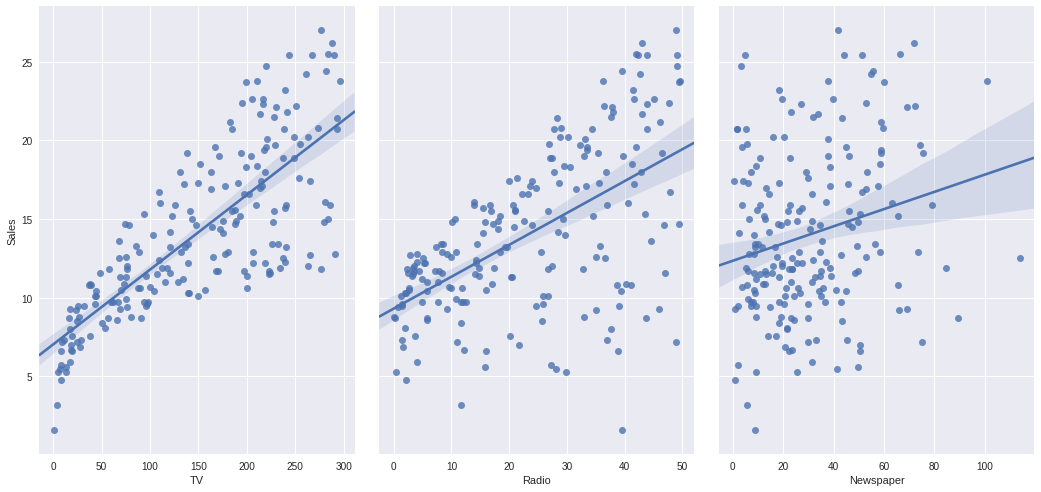

In [11]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7,kind='reg')

### Preparing X and y using Pandas

In [25]:
# taking a subset of the dataset with the mentioned headers in the inner list
feature_cols = ['TV','Radio','Newspaper']
X = data[['TV','Radio','Newspaper']]

X.head()


,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [14]:
# y can be retrieved as this
y = data[['Sales']]

# or this
y = data.Sales

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [15]:
print X.shape
print y.shape

(200, 3)
(200,)


### Train/test data split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

# default is taken as 75% training, 25% testing 
#otherwise add a parameter into train_test_split as test_size between 0 and 1

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape


(150, 3)
(50, 3)
(150,)
(50,)


## Linear regression using scikit learn

In [22]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print linreg.intercept_
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [26]:
zip(feature_cols,linreg.coef_)

[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088841),
 ('Newspaper', 0.0034504647111804343)]

In [27]:
y_new = linreg.predict(X_test)

### Mean absolute error using Scikit-learn

In [29]:
from sklearn import metrics

print metrics.mean_absolute_error(y_test,y_new)

1.06689170826


### Mean squared error

In [30]:
print metrics.mean_squared_error(y_test,y_new)

1.97304562023


### Root mean squared error

In [31]:
import numpy as np
print np.sqrt(metrics.mean_squared_error(y_test,y_new))

1.40465142303
